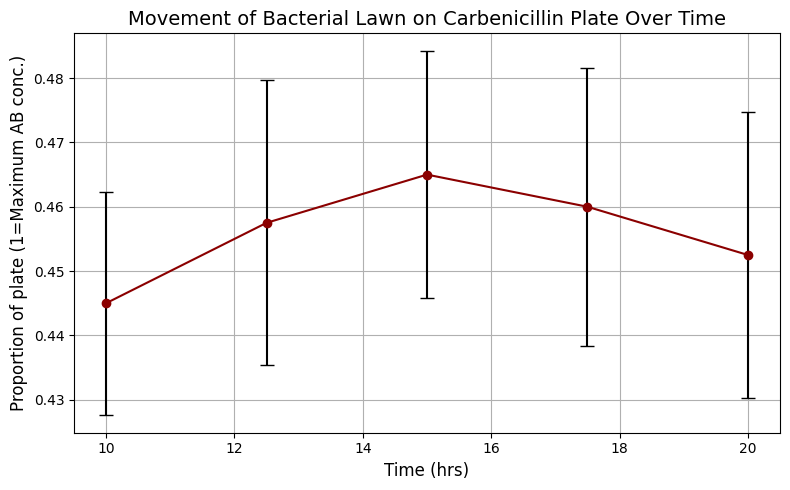

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with reading from Excel if needed)
data = {
    "Max_Conc": [25]*4,
    #"hr_5_prop":  [],
    "hr_10_prop": [0.42, 0.46, 0.45, 0.45],
    "hr_12.5_prop": [0.43, 0.48, 0.47, 0.45],
    "hr_15_prop": [0.45, 0.47, 0.49, 0.45],
    "hr_17.5_prop": [0.44, 0.46, 0.49, 0.45],
    "hr_20_prop": [0.43, 0.46, 0.48, 0.44]
    "hr_30_prop": []
    "hr_40_prop": []
    "hr_55_prop": []
    "hr_70_prop": []

}

df = pd.DataFrame(data)

# Convert proportions to actual MICs
#for col in df.columns[1:]:
    #df[col.replace("_prop", "_MIC")] = df["Max_Conc"] * df[col]

# Calculate mean and standard deviation for each time point
timepoints = [ "hr_10","hr_12.5", "hr_15", "hr_17.5", "hr_20"]
means = []
stds = []

for t in timepoints:
    mic_col = f"{t}_prop"
    means.append(df[mic_col].mean())
    stds.append(df[mic_col].std())

# Plotting
plt.figure(figsize=(8, 5))
hours = [10, 12.5, 15, 17.5, 20]
plt.errorbar(hours, means, yerr=stds, fmt='o-', color='darkred', ecolor='black', capsize=5)
plt.xlabel("Time (hrs)", fontsize=12)
plt.ylabel("Proportion of plate (1=Maximum AB conc.)", fontsize=12)
plt.title("Movement of Bacterial Lawn on Carbenicillin Plate Over Time", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert proportions to actual MICs
for col in df.columns[1:]:
    df[col.replace("_prop", "_MIC")] = df["Max_Conc"] * df[col]

<ipython-input-14-15b73f5ad3c2>:21: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(hybrid_fixed, times, measured_means, p0=[10, 0.5, 0.5, 0.5])


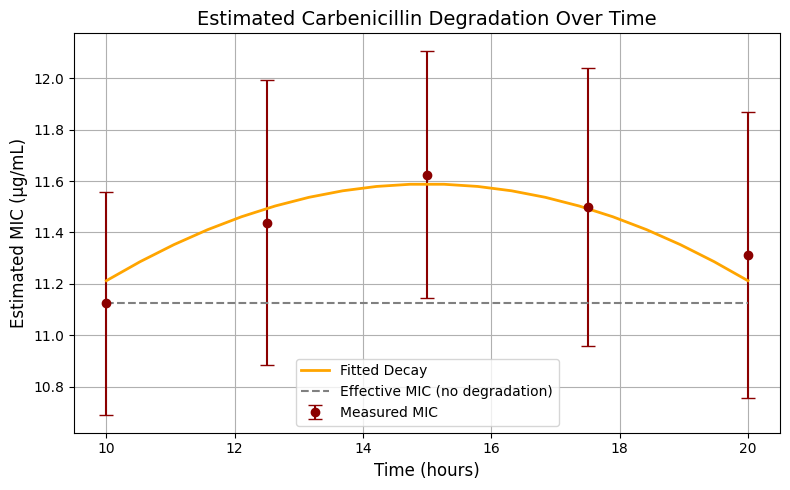

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Time points (hours)
times = np.array([10,12.5,15,17.5,20])

# Example MICs from earlier step
measured_means = np.array([df[f"hr_{hr}_MIC"].mean() for hr in [10,12.5,15,17.5,20]])
measured_stds  = np.array([df[f"hr_{hr}_MIC"].std()  for hr in [10,12.5,15,17.5,20]])

# --- Fit an exponential decay model ---
def exp_decay(t, a, k, c):
    return a * np.exp(-k * t) + c
def hybrid_fixed(t, a1, c1, a2, k):
    b1 = 15  # fixed hump center
    c2 = 0.1  # fixed asymptote
    return a1 * np.exp(-((t - b1)**2) / (2 * c1**2)) + a2 * np.exp(-k * t) + c2

params, _ = curve_fit(hybrid_fixed, times, measured_means, p0=[10, 0.5, 0.5, 0.5])

# --- Generate fitted curve ---
t_fine = np.linspace(10, 20, 20)
fitted = hybrid_fixed(t_fine, *params)

# --- Optional: define a theoretical constant MIC if no degradation occurred ---
effective_mic = [measured_means[0]] * len(t_fine)

# --- Plotting --
plt.figure(figsize=(8, 5))
plt.errorbar(times, measured_means, yerr=measured_stds, fmt='o', label='Measured MIC', color='darkred', capsize=5)
plt.plot(t_fine, fitted, label=f'Fitted Decay', color='orange', lw=2)
plt.plot(t_fine, effective_mic, '--', label='Effective MIC (no degradation)', color='gray')

plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Estimated MIC (µg/mL)", fontsize=12)
plt.title("Estimated Carbenicillin Degradation Over Time", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Timepoints (hours) and measured MICs
times = np.array([10, 12.5, 15, 17.5, 20])
ave_prop = np.array([0.69, 0.735, 0.745, 0.735, 0.7275])  # Replace with your averages
ave_MIC = df["Max_Conc"] * ave_prop


# --- Fit an exponential decay model ---
# Exponential decay model
def decay(t, a, k):
    return a * np.exp(-k * t)

# Fit model
params, _ = curve_fit(decay, times, ave_MIC, p0=[5.825, 0.1])
a_fit, k_fit = params
half_life = np.log(2) / k_fit

# Extrapolate to t=0
t_fit = np.linspace(0, 20, 100)
mic_fit = decay(t_fit, a_fit, k_fit)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(times, ave_MIC, label="Average MIC", color='black')
plt.plot(t_fit, mic_fit, label=f"Fitted decay (t½ ≈ {half_life:.2f} h)", color='red')
plt.axhline(y=0.9, color='gray', linestyle='--', label='Expected @10h (t½=2h)')
plt.xlabel("Time (h)")
plt.ylabel("MIC (µg/mL)")
plt.legend()
plt.title("Mecillinam Degradation Curve")
plt.tight_layout()
plt.show()

# Print result
print(f"Estimated MEC half-life: {half_life:.2f} hours")


ValueError: operands could not be broadcast together with shapes (4,) (5,) 